In [1]:
import pandas as pd  
import numpy as np

In [5]:
# load data
data = pd.read_csv(r'C:\Users\ryanr\Desktop\anti-trafficking\default_filled_simple.csv')

def split_data_into_timesteps(data: pd.DataFrame, time="yearOfRegistration") -> dict:
    # Split the data into time steps
    time_steps = data[time].unique()
    data_by_time = {t: data[data[time] == t].drop(columns=[time]).to_numpy() for t in time_steps}

    return data_by_time

def get_graph_covariance(data: np.ndarray) -> np.ndarray:
    # Compute the graph covariance matrix
    n = data.shape[0]
    mean = np.mean(data, axis=0).reshape(1, -1)
    data_centered = data - mean
    # normalize the data
    data_centered = data_centered / data_centered.std(axis=0).reshape(1, -1)
    graph_covariance = (data_centered.T @ data_centered) / (n-1)

    return graph_covariance

In [8]:
# remove nan rows data 
data = data.dropna()
# print statistics of data
print(data.describe())
# and one hot encode every column other than yearOfRegistration
columns = data.columns
columns = columns.drop('yearOfRegistration')
data = pd.get_dummies(data, columns = columns)
# split data into time steps
data_by_time = split_data_into_timesteps(data)
# count the number of time steps for each year
for year in data_by_time:
    print(year, len(data_by_time[year]))

       yearOfRegistration
count       238619.000000
mean          2016.614042
std              4.159823
min           2002.000000
25%           2016.000000
50%           2017.000000
75%           2019.000000
max           2022.000000
2014.0 5986
2015.0 8934
2016.0 64062
2010.0 3730
2013.0 4090
2017.0 16534
2018.0 20011
2019.0 29850
2020.0 25070
2008.0 2385
2009.0 2178
2021.0 18591
2022.0 15338
2012.0 2903
2011.0 4116
2006.0 3304
2002.0 1838
2003.0 965
2004.0 1630
2005.0 3980
2007.0 3124


In [14]:
# apply general covariance algorithm on the data
graph_covariances = {int(t): get_graph_covariance(data) for t, data in data_by_time.items()}

C:\Users\ryanr\AppData\Local\Temp\ipykernel_24816\1226529835.py:17: RuntimeWarning: invalid value encountered in divide
  data_centered = data_centered / data_centered.std(axis=0).reshape(1, -1)


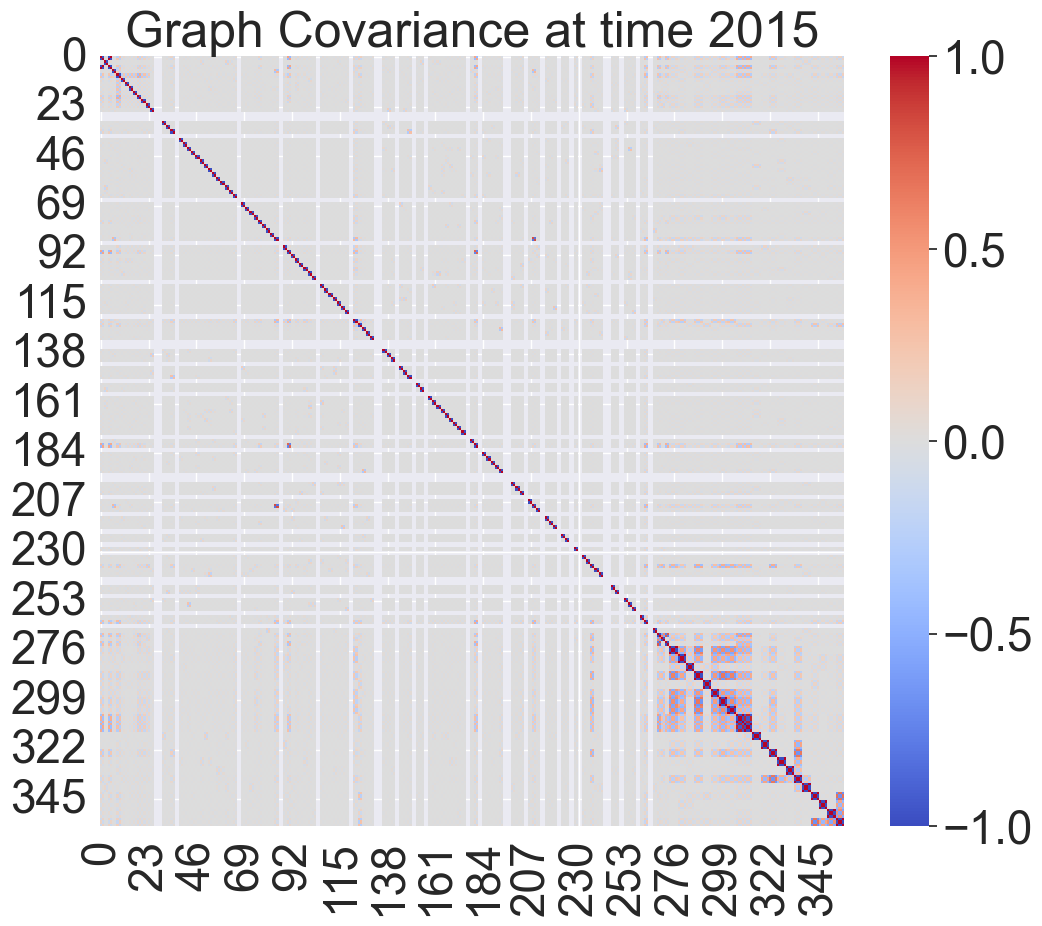

In [16]:
# create heatmap of graph covariance
import seaborn as sns
import matplotlib.pyplot as plt

t, graph_covariance = 2015, graph_covariances[2015]
sns.set(font_scale=3)
plt.figure(figsize=(12, 10))
sns.heatmap(graph_covariance, cmap='coolwarm', center=0)
plt.title(f'Graph Covariance at time {t}')
plt.show()

In [20]:
def find_k_max_cov_pairs(cov_dict, k=3, ignore_diag=True):
    """
    Find the k variable pairs (i, j) with the highest maximum absolute covariance
    over time in cov_dict. If ignore_diag is True, diagonal elements are ignored.
    
    Parameters:
      cov_dict (dict): keys are years (int) and values are covariance matrices (np.ndarray)
      k (int): number of top pairs to return
      ignore_diag (bool): whether to ignore diagonal entries
      
    Returns:
      top_pairs (list): list of tuples (i, j) corresponding to the k highest absolute covariance pairs.
    """
    # Assume all covariance matrices are of the same shape
    some_year = next(iter(cov_dict))
    print(some_year)
    cov_sample = cov_dict[some_year]
    n = cov_sample.shape[0]
    
    # Initialize a matrix to hold the maximum absolute covariance seen for each pair
    max_abs_mat = np.zeros((n, n))
    
    for year, cov in cov_dict.items():
        temp_cov = cov.copy()
        if ignore_diag:
            np.fill_diagonal(temp_cov, 0)
        max_abs_mat = np.maximum(max_abs_mat, np.abs(temp_cov))
        
    # To avoid double counting symmetric pairs, only consider i < j
    pair_list = []
    for i in range(n):
        for j in range(i+1, n):
            pair_list.append(((i, j), max_abs_mat[i, j]))
            
    # Sort pairs in descending order of max absolute covariance value
    pair_list = sorted(pair_list, key=lambda x: x[1], reverse=True)
    
    # Return the top k pairs (or all if there are fewer than k pairs)
    top_pairs = [pair for pair, value in pair_list[:k]]
    return top_pairs

2014


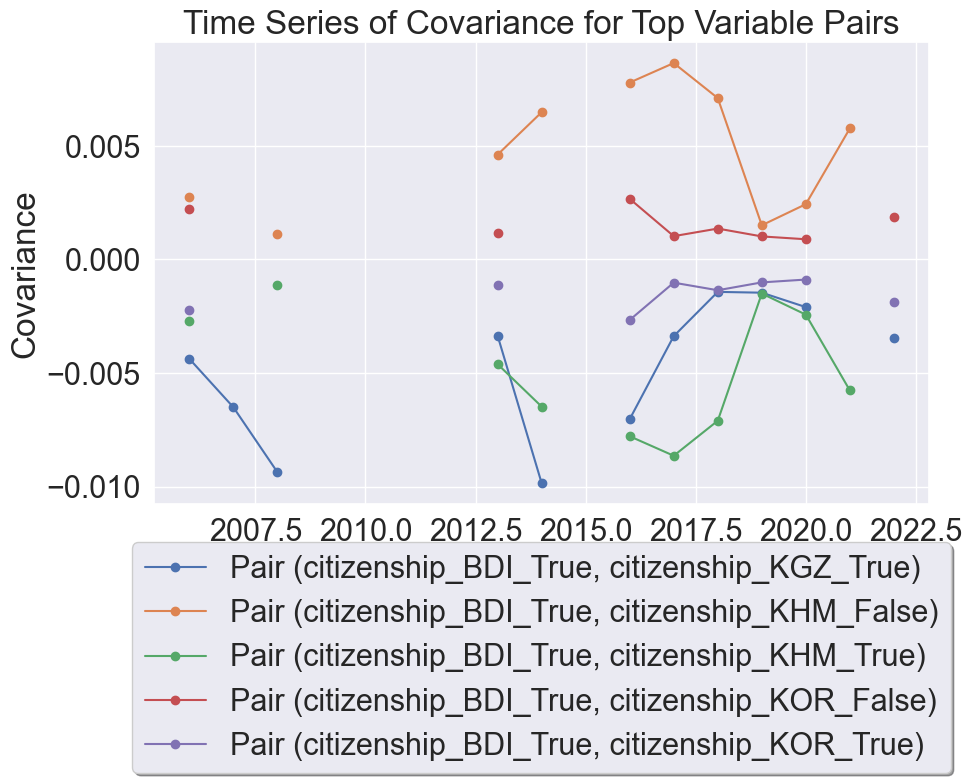

Indices with highest absolute covariance: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (1, 350), (0, 269), (0, 8), (0, 9), (0, 18), (0, 19), (0, 10), (0, 11), (123, 355), (123, 356), (123, 357), (0, 12), (0, 13), (0, 20), (0, 21), (0, 22), (0, 23), (0, 15), (0, 14), (0, 16), (0, 17), (0, 24), (0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (0, 30), (0, 31), (0, 32), (0, 33), (0, 35), (0, 34), (0, 36), (0, 37), (0, 38), (0, 39), (0, 40), (0, 41), (0, 42), (0, 43), (0, 44), (0, 45), (0, 46), (0, 47), (0, 48), (0, 49), (0, 50), (0, 51), (0, 52), (0, 53), (0, 54), (0, 55), (0, 56), (0, 57), (0, 58), (0, 59), (0, 60), (0, 61), (0, 62), (0, 63), (0, 64), (0, 65), (0, 66), (0, 67), (0, 68), (0, 69), (0, 70), (0, 71), (0, 72), (0, 73), (0, 74), (0, 75), (0, 76), (0, 77), (0, 78), (0, 79), (0, 80), (0, 81), (0, 82), (0, 83), (0, 85), (0, 84), (0, 86), (0, 87), (0, 88), (0, 89), (0, 90), (0, 91), (0, 92), (0, 93), (0, 94), (0, 95), (0, 96), (0, 97), (0, 98), (0, 99), (0, 102), (0, 103),

In [45]:
def plot_cov_over_time_k(cov_dict, pairs, labels):
    """
    Plot the time series of covariance values for each variable pair in pairs.
    
    Parameters:
      cov_dict (dict): keys are years (int) and values are covariance matrices (np.ndarray)
      pairs (list): list of tuples (i, j) representing variable pairs
      
    Returns:
      years (list) and cov_values (dict): sorted years and a dictionary mapping each pair to its covariance time series.
    """
    years = sorted(cov_dict.keys())
    cov_values = {}
    
    plt.figure(figsize=(10, 6))
    
    for pair in pairs:
        values = [cov_dict[year][pair[0], pair[1]] for year in years]
        cov_values[pair] = values
        pair_str = f'({labels[pair[0]]}, {labels[pair[1]]})'
        plt.plot(years, values, marker='o', label=f'Pair {pair_str}')
        
    plt.xlabel('Year')
    plt.ylabel('Covariance')
    plt.title('Time Series of Covariance for Top Variable Pairs')
    # put legend at top
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=1)
    plt.grid(True)
    plt.show()
    
    return years, cov_values

# Example usage:
# Assume cov_dict is a dictionary with keys as years and values as np.ndarray covariance matrices.
# For example:
# cov_dict = {2000: np.array(...), 2001: np.array(...), ... }

k = 10000 # Change k to however many pairs you want
sns.set(font_scale=2)

top_pairs = find_k_max_cov_pairs(graph_covariances, k=k)
years, cov_values = plot_cov_over_time_k(graph_covariances, top_pairs[k-5:], labels=data.columns.drop('yearOfRegistration'))
print("Indices with highest absolute covariance:", top_pairs)